This will plot and compare the resulting data. To run this, make sure that you have already generated all data you want to be compared. For instructions on how to run the generation, see README-new.md

In [71]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

from cloudmesh.common.Shell import Shell
from cloudmesh.common.parameter import Parameter
from cloudmesh.common.dotdict import dotdict

from cloudmesh.common.util import banner
from analysis import get_data, read_log, generate_df
pd.options.mode.chained_assignment = None 


In [72]:
df = generate_df()

In [73]:
df

,p,size,repeat,sort,user,node,t,c,time
0,18,100,10,mp,alex,v100,None,None,0.088
1,18,100,10,mp,alex,v100,None,None,0.076
2,18,100,10,mp,alex,v100,None,None,0.082
3,18,100,10,mp,alex,v100,None,None,0.075
4,18,100,10,mp,alex,v100,None,None,0.077
...,...,...,...,...,...,...,...,...,...
595,1,1000,10,seq,alex,2400mhz,None,None,0.002
596,1,1000,10,seq,alex,2400mhz,None,None,0.002
597,1,1000,10,seq,alex,2400mhz,None,None,0.002
598,1,1000,10,seq,alex,2400mhz,None,None,0.002


In [75]:
def average_df(df):
    _df = df.groupby(['p','size','repeat','sort','user','node','t','c'], sort=True, as_index=False).agg({'time':'mean'})
    _df.reset_index()
    return _df

In [76]:
df = average_df(df)
print(df.to_string())

     p  size  repeat sort  user     node     t     c    time
0    1    50      10   mp  alex     v100  None  None  0.0251
1    1    50      10  mpi  alex     v100  None  None  0.9253
2    1    50      10  seq  alex     v100  None  None  0.0000
3    1   100      10   mp  alex     v100  None  None  0.0152
4    1   100      10  seq  alex     v100  None  None  0.0000
5    1  1000      10   mp  alex  2400mhz  None  None  0.5007
6    1  1000      10  seq  alex  2400mhz  None  None  0.0022
7    1  1000      10  seq  alex     v100  None  None  0.0024
8    1  2000      10   mp  alex  2400mhz  None  None  0.4846
9    1  2000      10  seq  alex  2400mhz  None  None  0.0052
10   1  2000      10  seq  alex     v100  None  None  0.0053
11   2    50      10   mp  alex     v100  None  None  0.0181
12   2   100      10   mp  alex     v100  None  None  0.0172
13   2  1000      10   mp  alex  2400mhz  None  None  0.5049
14   2  2000      10   mp  alex  2400mhz  None  None  0.5255
15   3    50      10   m

In [77]:
def calculate_speedup(df):
    frames = []
    gb = df.groupby(['size','repeat','user','node','t','c'])
    for x in gb.groups:
        _df = gb.get_group(x)
        seq_time = _df[_df['sort'] == 'seq'].iat[0, 8]
        # print(seq_time)
        scale = 1 / seq_time
        # print(scale)
        
        _df['speedup'] = _df['time'].rdiv(seq_time)
        frames.append(_df)
    ans = pd.concat(frames)
    return ans

In [106]:
def calculate_efficiency(df):
    ans = calculate_speedup(df)
    ans['efficiency'] = ans['speedup'] / ans['p']
    return ans

In [114]:
_df = calculate_efficiency(df)
_df

/var/folders/9z/_9vl5v9s7mgc48qt12wb56d40000gr/T/ipykernel_71664/2095647237.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  scale = 1 / seq_time


,p,size,repeat,sort,user,node,t,c,time,speedup,efficiency
0,1,50,10,mp,alex,v100,None,None,0.0251,0.000000,0.000000
1,1,50,10,mpi,alex,v100,None,None,0.9253,0.000000,0.000000
2,1,50,10,seq,alex,v100,None,None,0.0000,NaN,NaN
11,2,50,10,mp,alex,v100,None,None,0.0181,0.000000,0.000000
15,3,50,10,mp,alex,v100,None,None,0.0208,0.000000,0.000000
18,4,50,10,mp,alex,v100,None,None,0.0268,0.000000,0.000000
20,5,50,10,mp,alex,v100,None,None,0.0332,0.000000,0.000000
22,6,50,10,mp,alex,v100,None,None,0.0332,0.000000,0.000000
24,7,50,10,mp,alex,v100,None,None,0.0398,0.000000,0.000000
26,8,50,10,mp,alex,v100,None,None,0.0425,0.000000,0.000000


In [120]:
def plot_benchmark(df, x_axis, y_axis, hue, tag=None):
    hues = df[hue].unique()
    hues = [str(hue) for hue in hues]
    # name the image
    hues_name = "-".join(hues)
    name = f"{y_axis}-by-{x_axis}-{hues_name}"
    sns.lineplot(data=df, x=x_axis, y=y_axis, hue=hue)
    plt.title(name)
    plt.savefig(f"images/{name}.png")
    plt.savefig(f"images/{name}.pdf")

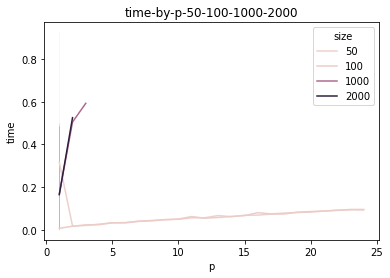

In [121]:
plot_benchmark(_df, 'p', 'time', 'size')

In [32]:
def get_values(df, processes, sizes, sorts, users, nodes):
    _df = df[df['p'].isin(processes) & df['size'].isin(sizes) & df['sort'].isin(sorts) & df['user'].isin(users) & df['node'].isin(nodes)]
    return _df

In [33]:
df = get_values(df, [1, 2, 3], [50], ["mp", "mpi", "seq"], ["alex"], ["v100"])
df

,p,size,repeat,sort,user,node,t,c,time
0,1,50,10,mp,alex,v100,None,None,0.0251
1,1,50,10,mpi,alex,v100,None,None,0.9253
2,1,50,10,seq,alex,v100,None,None,0.0000
5,2,50,10,mp,alex,v100,None,None,0.0181
7,3,50,10,mp,alex,v100,None,None,0.0208


In [10]:
_df

,p,size,repeat,sort,user,node,t,c,time
10,2,50,10,mp,alex,v100,None,None,0.028
11,2,50,10,mp,alex,v100,None,None,0.017
12,2,50,10,mp,alex,v100,None,None,0.017
13,2,50,10,mp,alex,v100,None,None,0.016
14,2,50,10,mp,alex,v100,None,None,0.018
15,2,50,10,mp,alex,v100,None,None,0.016
16,2,50,10,mp,alex,v100,None,None,0.017
17,2,50,10,mp,alex,v100,None,None,0.017
18,2,50,10,mp,alex,v100,None,None,0.017
19,2,50,10,mp,alex,v100,None,None,0.018


In [ ]:
def plot_benchmark_by_size(df, size=None, tag=None, files=None, x="sizes", y="time"):
    names = "-".join(files)
    sns.lineplot(data=df, x=x, y=y, hue="name");
    t = tag.title()
    label = f"{t}".replace("_", " ")
    plt.title(f"{label}")
    if "time" in y: y = f"{y}/s"
    if "time" in x: x = f"{x}/s"
    plt.xlabel(x.capitalize())
    plt.ylabel(y.capitalize())
    plt.savefig(f"images/{tag}-{names}.png")
    plt.savefig(f"images/{tag}-{names}.pdf")

In [ ]:
def plot()

In [ ]:
df

In [ ]:
df = df.pivot_table(
    values='time', index=['tag', 'processes'], columns=['name', 'size'], fill_value=0, aggfunc='mean')

In [ ]:
df

In [11]:
print(df.loc['mp-mergesort'])
speedup = df.rdiv(df.loc['seq-merge'].iloc[0])
speedup

KeyError: 'mp-mergesort'